In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **1. Data Cleaning & Preprocessing**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving blinkit_products.csv to blinkit_products.csv


In [3]:
import pandas as pd

df = pd.read_csv("blinkit_products.csv")
df.head()

product_id product_name             category                    brand  \
0      153019       Onions  Fruits & Vegetables               Aurora LLC   
1       11422     Potatoes  Fruits & Vegetables           Ramaswamy-Tata   
2      669378     Potatoes  Fruits & Vegetables          Chadha and Sons   
3      848226     Tomatoes  Fruits & Vegetables           Barad and Sons   
4      890623       Onions  Fruits & Vegetables  Sangha, Nagar and Varty   

    price      mrp  margin_percentage  shelf_life_days  min_stock_level  \
0  947.95  1263.93               25.0                3               13   
1  127.16   169.55               25.0                3               20   
2  212.14   282.85               25.0                3               23   
3  209.59   279.45               25.0                3               10   
4  354.52   472.69               25.0                3               27   

   max_stock_level  
0               88  
1               65  
2               70  
3               51  
4               55

In [4]:
df.isnull().sum()

product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64

In [5]:
df.dtypes

product_id             int64
product_name          object
category              object
brand                 object
price                float64
mrp                  float64
margin_percentage    float64
shelf_life_days        int64
min_stock_level        int64
max_stock_level        int64
dtype: object

In [6]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['mrp'] = pd.to_numeric(df['mrp'], errors='coerce')

In [7]:
df = df.drop(columns=['min_stock_level', 'max_stock_level'])

In [8]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


# **2. Exploratory Data Analysis (EDA)**

In [9]:

df_cleaned.head()


product_id product_name             category                    brand  \
0      153019       Onions  Fruits & Vegetables               Aurora LLC   
1       11422     Potatoes  Fruits & Vegetables           Ramaswamy-Tata   
2      669378     Potatoes  Fruits & Vegetables          Chadha and Sons   
3      848226     Tomatoes  Fruits & Vegetables           Barad and Sons   
4      890623       Onions  Fruits & Vegetables  Sangha, Nagar and Varty   

    price      mrp  margin_percentage  shelf_life_days  
0  947.95  1263.93               25.0                3  
1  127.16   169.55               25.0                3  
2  212.14   282.85               25.0                3  
3  209.59   279.45               25.0                3  
4  354.52   472.69               25.0                3

In [10]:
df_cleaned.to_excel('cleaned_data.xlsx', index=False)


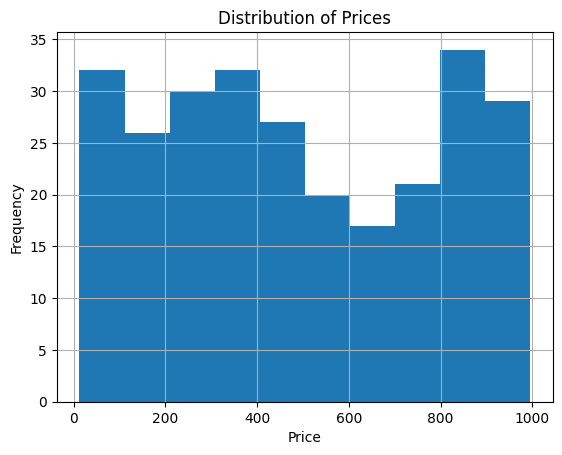

In [11]:
import matplotlib.pyplot as plt


df_cleaned['price'].hist(bins=10)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [12]:

df_cleaned.describe()


df_cleaned['price'].mean(), df_cleaned['price'].std(), df_cleaned['price'].min(), df_cleaned['price'].max()


(488.356828358209, 298.487199586296, 12.32, 995.98)

# **3. Price and MRP Relationship**

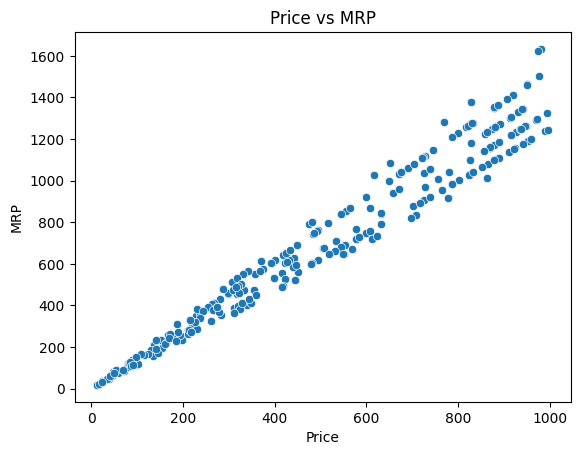

In [13]:
import seaborn as sns


sns.scatterplot(data=df_cleaned, x='price', y='mrp')
plt.title('Price vs MRP')
plt.xlabel('Price')
plt.ylabel('MRP')
plt.show()


In [14]:

category_summary = df_cleaned.groupby('category')['price'].mean()
print(category_summary)


brand_summary = df_cleaned.groupby('brand')['price'].mean()
print(brand_summary)


category
Baby Care                516.152500
Cold Drinks & Juices     500.515000
Dairy & Breakfast        569.096333
Fruits & Vegetables      546.535185
Grocery & Staples        397.357500
Household Care           403.194444
Instant & Frozen Food    420.345000
Personal Care            441.595600
Pet Care                 546.934000
Pharmacy                 599.026800
Snacks & Munchies        417.106667
Name: price, dtype: float64
brand
Acharya Ltd                 671.55
Acharya PLC                  84.20
Agarwal-Dhar                877.43
Agate Ltd                   369.28
Agate and Sons               22.04
                             ...  
Wali, Sood and Bala         127.08
Wali, Virk and Iyer         598.83
Warrior, Ravel and Amble     12.32
Yogi Group                  217.50
Yohannan Inc                483.05
Name: price, Length: 267, dtype: float64


In [15]:
df_cleaned.to_excel('cleaned_data_final.xlsx', index=False)


# **Data Visualization**

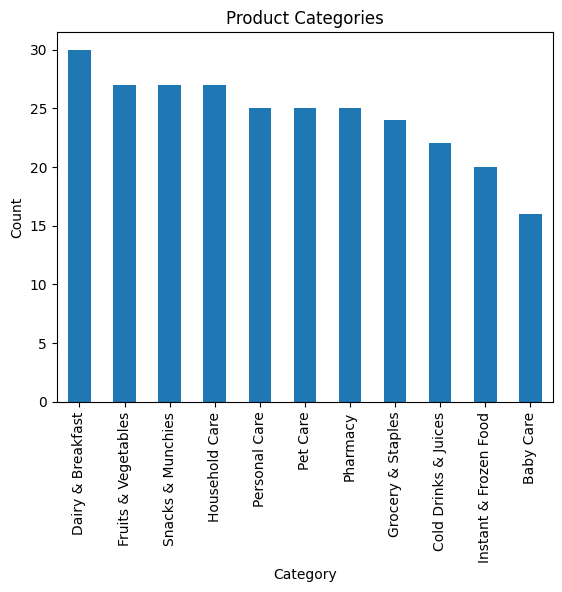

In [17]:
df_cleaned['category'].value_counts().plot(kind='bar')
plt.title('Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

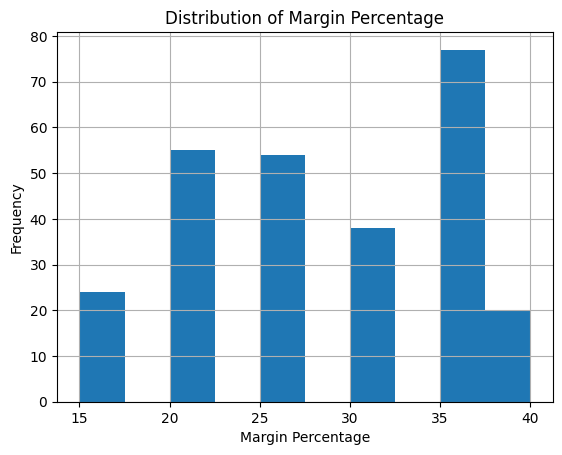

In [18]:
df_cleaned['margin_percentage'].hist(bins=10)
plt.title('Distribution of Margin Percentage')
plt.xlabel('Margin Percentage')
plt.ylabel('Frequency')
plt.show()

# **Predictive Modeling (Linear Regression)**

In [19]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(df_cleaned[['mrp']], df_cleaned['price'])


predicted_price = model.predict(df_cleaned[['mrp']])
df_cleaned['predicted_price'] = predicted_price


In [20]:
category_price_summary = df_cleaned.groupby('category')['price'].mean()
category_margin_summary = df_cleaned.groupby('category')['margin_percentage'].mean()

# **Key Business Insights & Recommendations**

In [21]:
print("Average Price by Category:")
print(category_price_summary)
print("\nAverage Margin Percentage by Category:")
print(category_margin_summary)

Average Price by Category:
category
Baby Care                516.152500
Cold Drinks & Juices     500.515000
Dairy & Breakfast        569.096333
Fruits & Vegetables      546.535185
Grocery & Staples        397.357500
Household Care           403.194444
Instant & Frozen Food    420.345000
Personal Care            441.595600
Pet Care                 546.934000
Pharmacy                 599.026800
Snacks & Munchies        417.106667
Name: price, dtype: float64

Average Margin Percentage by Category:
category
Baby Care                30.0
Cold Drinks & Juices     30.0
Dairy & Breakfast        20.0
Fruits & Vegetables      25.0
Grocery & Staples        15.0
Household Care           25.0
Instant & Frozen Food    40.0
Personal Care            35.0
Pet Care                 35.0
Pharmacy                 20.0
Snacks & Munchies        35.0
Name: margin_percentage, dtype: float64


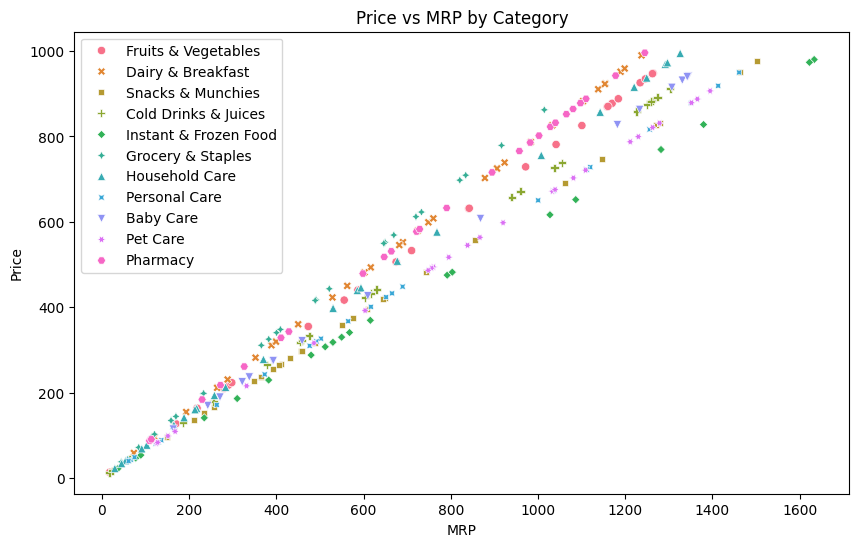

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='mrp', y='price', hue='category', style='category')
plt.title('Price vs MRP by Category')
plt.xlabel('MRP')
plt.ylabel('Price')
plt.legend()
plt.show()

# **4. Profit Margin Analysis**

In [22]:
df_cleaned['profit_margin'] = ((df_cleaned['mrp'] - df_cleaned['price']) / df_cleaned['mrp']) * 100

In [23]:
print("Profit Margin Stats:")
print(df_cleaned['profit_margin'].describe())

Profit Margin Stats:
count    268.000000
mean      27.779930
std        7.458682
min       14.996496
25%       20.000264
50%       29.999386
75%       34.999881
max       40.000852
Name: profit_margin, dtype: float64


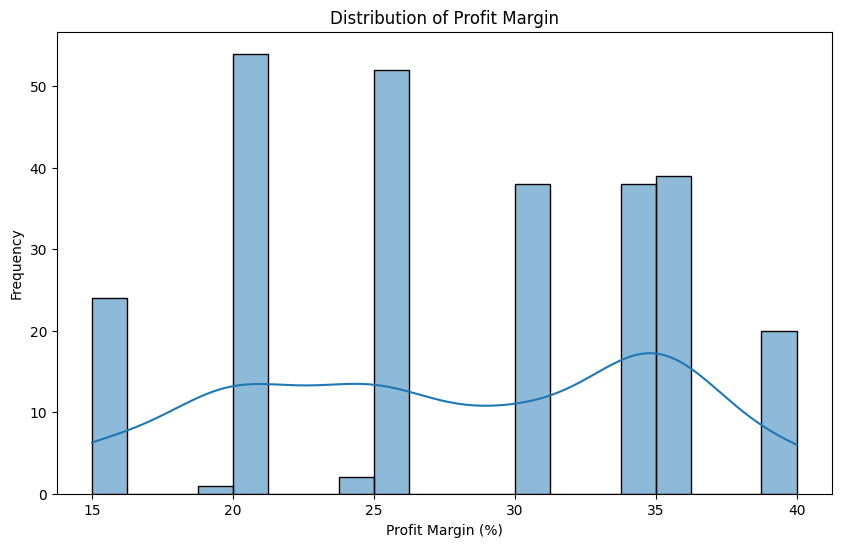

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['profit_margin'], kde=True, bins=20)
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()

In [25]:
brand_profit_summary = df_cleaned.groupby('brand')['profit_margin'].mean()


print("Average Profit Margin by Brand:")
print(brand_profit_summary)

Average Profit Margin by Brand:
brand
Acharya Ltd                 34.999758
Acharya PLC                 35.000772
Agarwal-Dhar                25.000214
Agate Ltd                   40.000325
Agate and Sons              39.994555
                              ...    
Wali, Sood and Bala         25.000000
Wali, Virk and Iyer         20.000267
Warrior, Ravel and Amble    30.000000
Yogi Group                  25.000000
Yohannan Inc                34.999664
Name: profit_margin, Length: 267, dtype: float64


In [26]:
df_cleaned.to_excel('final_cleaned_data.xlsx', index=False)


df_cleaned.to_csv('final_cleaned_data.csv', index=False)

In [29]:
from google.colab import drive
import pandas as pd

# ربط Google Drive
drive.mount('/content/drive')

# حفظ الداتا بعد تنظيفها
df_cleaned.to_csv('/content/drive/My Drive/cleaned_blinkit_products.csv', index=False)


Mounted at /content/drive


In [31]:
from google.colab import files
files.download('/content/drive/My Drive/cleaned_blinkit_products.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>